# FRAUD DETECTION 

In [25]:
# Importing required Libraries

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

from scipy.stats import chi2_contingency
from scipy.stats import stats
import statistics as st

from sklearn.preprocessing import LabelEncoder
 
### Classifiers and Predictions
from sklearn import metrics
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,KFold

### Loading the Dataset

In [26]:
df = pd.read_csv("/Users/macbook/Downloads/onlinefraud.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [27]:
df.tail()      # Viewing the last 5 of the dataset

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1,0


### Checking for Missing Values

In [28]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

### Checking the number of rows and column in he dataset

In [29]:
df.shape

(6362620, 11)

### Creating a copy of the data before dropping identifier columns

In [30]:
df1 = df.copy()
df = df.drop(['nameOrig', 'nameDest', 'isFlaggedFraud', 'step'], axis =1)

## Visualizing the Distribution of Frauduent and Non Fradulent Transactions

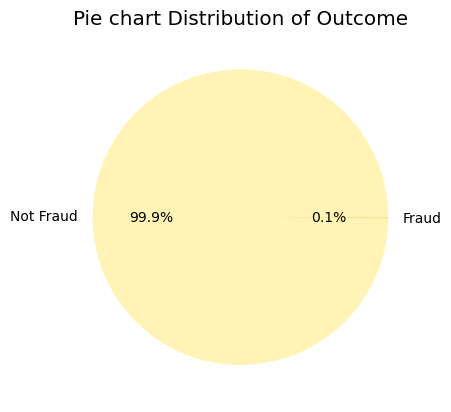

In [31]:
plt.pie(df['isFraud'].value_counts(), labels = ["Not Fraud", "Fraud"], colors = sns.color_palette("YlOrBr"), autopct = '%1.1f%%')
plt.title("Pie chart Distribution of Outcome")
plt.show()
pass

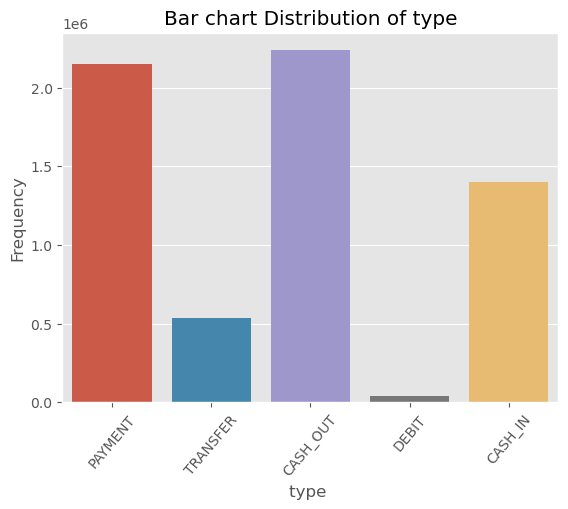

In [32]:
sns.countplot( x = "type", data=df)
plt.xlabel("type ")
plt.ylabel("Frequency")
plt.xticks(rotation=50)
plt.title("Bar chart Distribution of type")
plt.show()

## Getting the Descriptive Summary of the dataset

In [33]:
display(df.describe(include ='object'))
display(df.describe())

,type
count,6362620
unique,5
top,CASH_OUT
freq,2237500


,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03
std,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00
75%,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00
max,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00


# Computing the Correlation of Each Columns and Plotting it Heatmap

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
amount,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


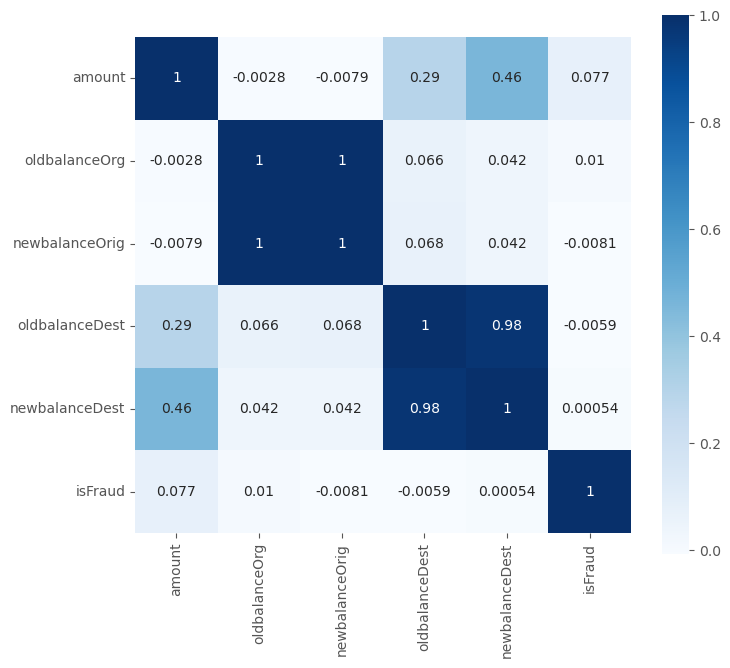

In [34]:
display(df.corr())
fig = plt.subplots(figsize = (8,7))
sns.heatmap(df.corr(), square = True, cmap = 'Blues', annot = True)
plt.show()

# FITTING MACHINE LEARNING MODELS

## Encoding categorical variables (e.g., 'type' column) using Label Encoder

In [35]:
df['type']= LabelEncoder().fit_transform(df['type'])
df.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,3,9839.64,170136.0,160296.36,0.0,0.0,0
1,3,1864.28,21249.0,19384.72,0.0,0.0,0
2,4,181.00,181.0,0.00,0.0,0.0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1
4,3,11668.14,41554.0,29885.86,0.0,0.0,0


# Splitting Text Size at 30%

In [36]:
from sklearn.model_selection import train_test_split

#Splitting the data to Train and Test Set
#70% training and 30% test

x = df.iloc[:, df.columns != 'isFraud'] # Extracting Predictors into variable x
y = df.iloc[:, df.columns == 'isFraud'] # Extracting target variable into variable y 

x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

## Standardizing the data using Standard Scaler

In [37]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaler = scaler.fit_transform(x_train)
x_test_scaler = scaler.transform(x_test)

x_train = pd.DataFrame(x_train_scaler, columns=x_train.columns)
x_test = pd.DataFrame(x_test_scaler, columns=x_test.columns)


display(x_train.head())
display(x_test.head())

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,-1.269750,-0.254067,-0.279251,-0.273915,1.785599,1.610575
1,-0.529071,0.274025,-0.288786,-0.292495,0.773570,0.775495
2,1.692965,2.793615,-0.288786,-0.292495,0.655424,1.002995
3,0.952286,-0.235860,-0.265683,-0.282589,-0.323153,-0.332704
4,-0.529071,0.325780,-0.280991,-0.292495,-0.269564,-0.180909


,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
0,-1.269750,0.249686,-0.281557,-0.172350,-0.190195,-0.299485
1,0.952286,-0.279176,-0.278264,-0.286087,-0.323153,-0.332704
2,-1.269750,-0.045737,-0.251859,-0.203913,-0.263994,-0.319373
3,1.692965,2.277575,-0.288786,-0.292495,0.616787,0.958547
4,-1.269750,-0.168737,0.723295,0.733962,-0.200951,-0.240919


In [38]:
# checking the shape of the train and test datasets

print("The shape of x_train_scaler is: ",x_train.shape)
print("The shape of x_test_scaler is: ",x_test.shape)
print("The shape of y_train is: ",y_train.shape)
print("The shape of y_test is: ",y_test.shape)

The shape of x_train_scaler is:  (4453834, 6)
The shape of x_test_scaler is:  (1908786, 6)
The shape of y_train is:  (4453834, 1)
The shape of y_test is:  (1908786, 1)


# Fitting the Model

# ALL TOGETHER

### Importing Neccessary Libraries

In [39]:
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score, recall_score, f1_score
from sklearn.metrics import f1_score

In [40]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Initiating the 4 Algotithms to be used

In [41]:
dt = DecisionTreeClassifier()
gnb = GaussianNB()
lrc = LogisticRegression()
xgb = XGBClassifier()

In [42]:
## Creating a list of all the initated algorithms
model_list = [dt, lrc, gnb, xgb]


# Creating empty contatiners to save and store the evaluation metrics 
# from each model during iteration of the four models

train_acc = []
test_acc = []
train_pre = []
test_pre = []
train_rec = []
test_rec = []
train_f1 = []
test_f1 = []


# Creating a for loop function to iterate and fit the 4 models, 
# therefore getting it evaluation metrics and appending
# them to the empty container created 

for i in model_list:
    i_model = i.fit(x_train_scaler,y_train)
    
    y_train_pred = i_model.predict(x_train_scaler)
    
    y_test_pred = i_model.predict(x_test_scaler)
    
    train_acc.append(accuracy_score(y_train,y_train_pred))
    
    test_acc.append(accuracy_score(y_test,y_test_pred))
    
    train_rec.append(recall_score(y_train,y_train_pred))
    
    test_rec.append(recall_score(y_test,y_test_pred))
    
    train_pre.append(precision_score(y_train,y_train_pred))
    
    test_pre.append(precision_score(y_test,y_test_pred))
    
    train_f1.append(f1_score(y_train,y_train_pred))
    
    test_f1.append(f1_score(y_test,y_test_pred))

## Iterating again to Display the Classifiction matric of each Algorithms

In [43]:
# Create a dictionary to store the classifiers
classifiers = {
    'Logistic Regression' : lrc,
    'Decision Tree': dt,
    'Gaussian Naive Bayes': gnb,
    'XGB': xgb
}

# Loop through the classifiers and display the classification report
for name, clf in classifiers.items():
    print('Classification Report for', name)
    y_pred = clf.predict(x_test_scaler)
    print(classification_report(y_test, y_pred))

Classification Report for Logistic Regression
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.89      0.40      0.55      2435

    accuracy                           1.00   1908786
   macro avg       0.95      0.70      0.78   1908786
weighted avg       1.00      1.00      1.00   1908786

Classification Report for Decision Tree
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.89      0.89      0.89      2435

    accuracy                           1.00   1908786
   macro avg       0.95      0.94      0.94   1908786
weighted avg       1.00      1.00      1.00   1908786

Classification Report for Gaussian Naive Bayes
              precision    recall  f1-score   support

           0       1.00      0.99      1.00   1906351
           1       0.03      0.16      0.05      2435

    accuracy                           0.99   190

## Iterating again to Display the Confusion Matrix of each Algorithms

Confusion Matrix - Logistic Regression:
[[1906236     115]
 [   1457     978]]



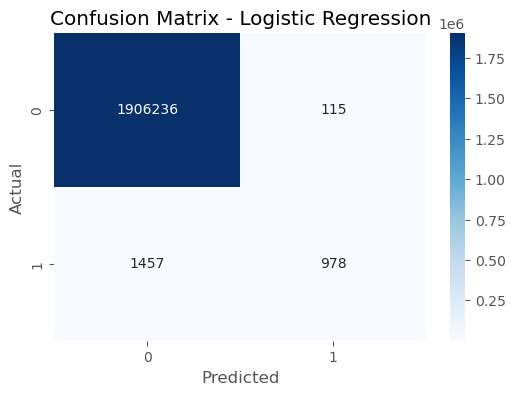

Confusion Matrix - Decision Tree:
[[1906095     256]
 [    277    2158]]



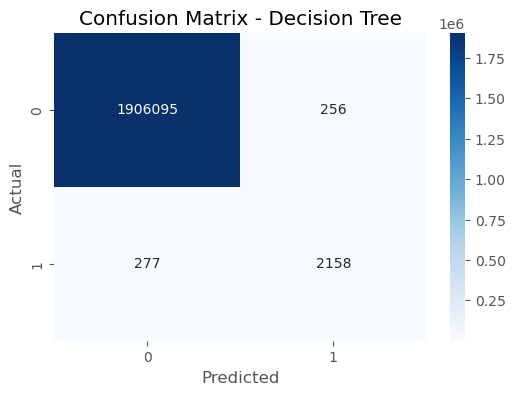

Confusion Matrix - Gaussian Naive Bayes:
[[1892926   13425]
 [   2043     392]]



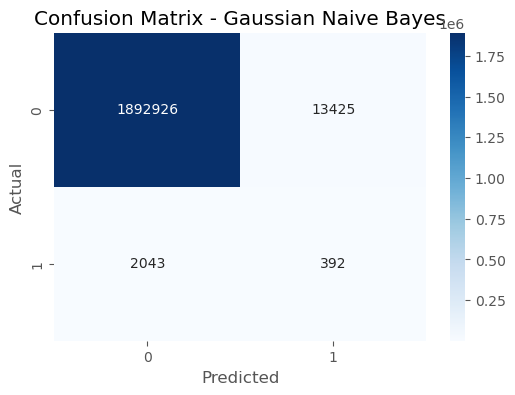

Confusion Matrix - XGB:
[[1906256      95]
 [    565    1870]]



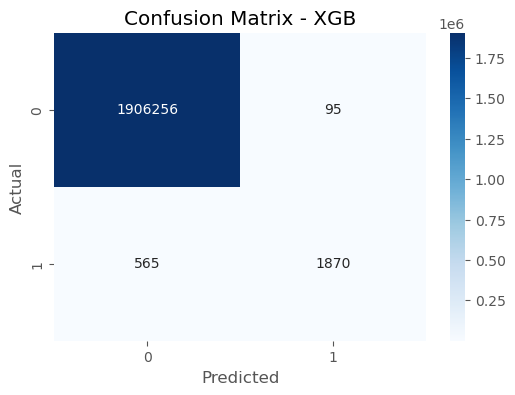

In [44]:
# Create a dictionary to store the classifiers
classifiers = {
    'Logistic Regression' : lrc,
    'Decision Tree': dt,
    'Gaussian Naive Bayes': gnb,
    'XGB': xgb
}
model_names = [ 'Decision Tree', 'Logistic Regression', 'Gaussian Naive Bayes', 'Xgboost']

# Loop through the classifiers and display the classification report
for name, clf in classifiers.items():
#     print('Classification Report for', name)
    y_pred = clf.predict(x_test_scaler)
#     print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix - {name}:\n{cm}\n")
    # Plot the confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
    plt.title(f'Confusion Matrix - {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


## visualizing the train model accuracy


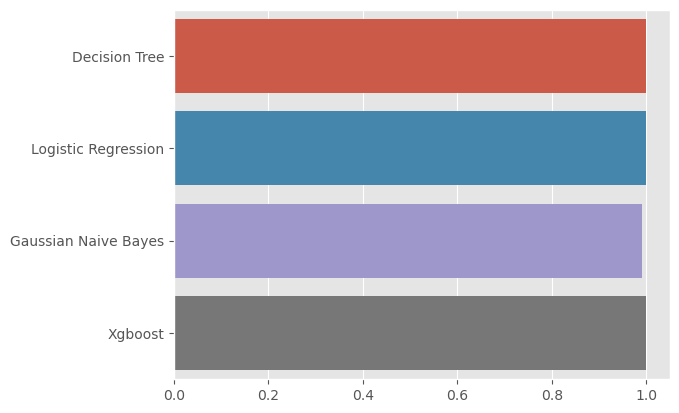

In [45]:
#visualizing the train model accuracy
sns.barplot(y=model_names,x=train_acc)
plt.show()

## visualizing the test model accuracy

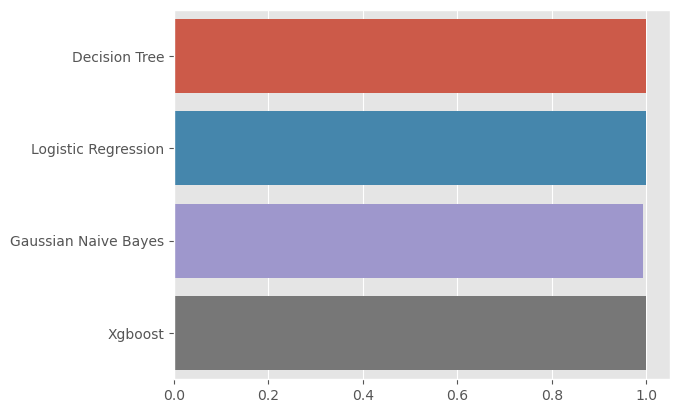

In [46]:
# visualizing the test model accuracy
sns.barplot(y=model_names,x=test_acc)
plt.show()

## Display summary of the performance

In [47]:
model_dict = {'Model':model_list,'Train Score':train_acc,'Test Score':test_acc}
model_dict

{'Model': [DecisionTreeClassifier(),
  LogisticRegression(),
  GaussianNB(),
  XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, device=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, feature_types=None,
                gamma=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, random_state=None, ...)],
 'Train Score': [1.0,
  0.9991703777015488,
  0.9918791315527251,
  0.9997184448275351],
 'Test Score': [0.9997207649259792,
  0.999176439894

In [48]:
#plot a table to show the summary

model_summary = pd.DataFrame({'Model':model_names,'Train Score':train_acc,'Test Score':test_acc,
                             'Train Precision': train_pre, 'Test Precision': test_pre,
                             'Train Recall': train_rec, 'Test Recall':test_rec,
                             'Train F1 score': train_f1, 'Test F1 score': test_f1}
                            )
model_summary

,Model,Train Score,Test Score,Train Precision,Test Precision,Train Recall,Test Recall,Train F1 score,Test F1 score
0,Decision Tree,1.000000,0.999721,1.000000,0.893952,1.000000,0.886242,1.000000,0.890080
1,Logistic Regression,0.999170,0.999176,0.894358,0.894785,0.408792,0.401643,0.561112,0.554422
2,Gaussian Naive Bayes,0.991879,0.991896,0.030960,0.028371,0.173589,0.160986,0.052547,0.048240
3,Xgboost,0.999718,0.999654,0.977820,0.951654,0.801142,0.767967,0.880708,0.850000


## Plotting the ROC Curve

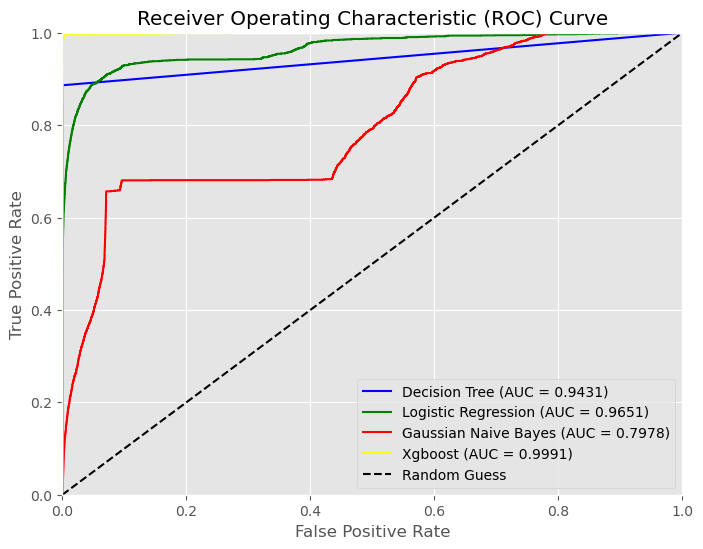

In [33]:
from sklearn.metrics import roc_curve, roc_auc_score

# model_list = [ dt, lrc, gnb]
# model_names = [ 'Decision Tree', 'Logistics Regression', 'Gaussian Naive Bayes']
colors = ['blue', 'green', 'red', "yellow"]

plt.figure(figsize=(8, 6))

for i, model in enumerate(model_list):
    model.fit(x_train, y_train)
    y_pred_prob = model.predict_proba(x_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    auc = roc_auc_score(y_test, y_pred_prob)
    plt.plot(fpr, tpr, color=colors[i], label=model_names[i] + ' (AUC = {:.4f})'.format(auc))

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# MODEL OPTIMIZATION

In [73]:
from imblearn.over_sampling import SMOTE

In [74]:
# Split into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Scale the training and testing data separately
scaler = StandardScaler()
x_train_scaler = scaler.fit_transform(x_train)
x_test_scaler = scaler.transform(x_test)

In [75]:
# Apply SMOTE to the training set
smote =  SMOTE(random_state=42)
x_train_resampled,y_train_resampled= smote.fit_resample(x_train_scaler, y_train)

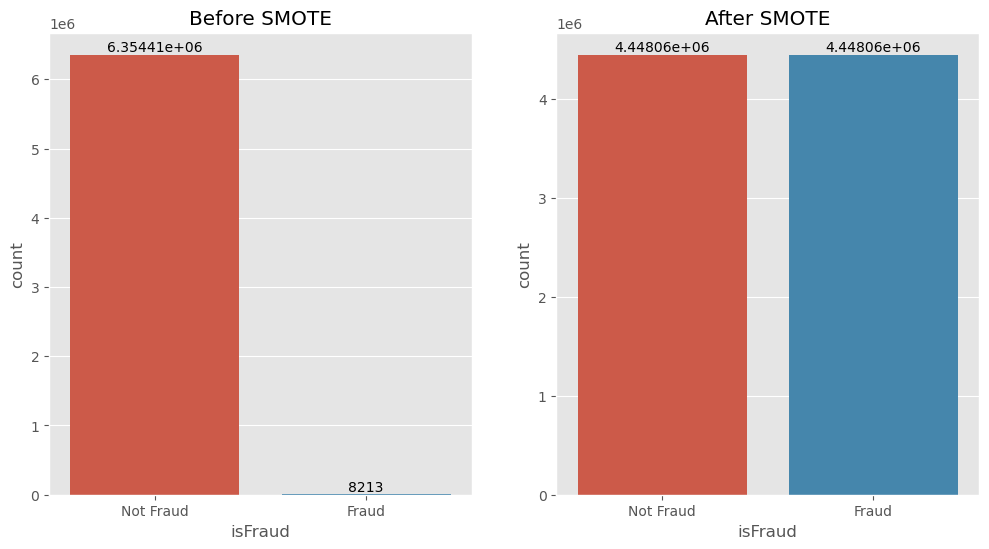

In [76]:
# Plot distribution of target variable before and after SMOTE
fig, axs = plt.subplots(ncols=2, figsize=(12, 6))
sns.countplot(data=df, x='isFraud', ax=axs[0])
axs[0].bar_label(axs[0].containers[0])
axs[0].set_title('Before SMOTE')
axs[0].set_xticklabels(['Not Fraud', "Fraud"])

sns.countplot(data=pd.DataFrame(y_train_resampled, columns=['isFraud']), x='isFraud', ax=axs[1])
axs[1].bar_label(axs[1].containers[0])
axs[1].set_title('After SMOTE')
axs[1].set_xticklabels(['Not Fraud', "Fraud"])

plt.show()


In [77]:
y_train_resampled['isFraud'].value_counts()

0    4448056
1    4448056
Name: isFraud, dtype: int64

In [78]:
# checking the shape of the train and test datasets

print("The shape of x_train_resampled is: ",x_train_resampled.shape)
print("The shape of x_test_scaler is: ",x_test_scaler.shape)
print("The shape of y_train_resampled is: ",y_train_resampled.shape)
print("The shape of y_test is: ",y_test.shape)

The shape of x_train_resampled is:  (8896112, 6)
The shape of x_test_scaler is:  (1908786, 6)
The shape of y_train_resampled is:  (8896112, 1)
The shape of y_test is:  (1908786, 1)


In [79]:
#Cretae list of models
# model_list = [ dt, lrc]
xgb = XGBClassifier()
models = [
    DecisionTreeClassifier(random_state=42),
    LogisticRegression(random_state=42),
    GaussianNB(),
    XGBClassifier(),
#     RandomForestClassifier(random_state=42),
#     SVC(kernel='linear', random_state=42)
]

# Perform k-fold cross-validation with k=5 for each model
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for model in models:
    cv_results = cross_val_score(model, x_train_resampled, y_train_resampled, cv=kf)
    print(f"Accuracy for {model.__class__.__name__}: {cv_results}")
    print(f"Average accuracy for {model.__class__.__name__}: {cv_results.mean()}\n")

Accuracy for DecisionTreeClassifier: [0.9994891  0.99951945 0.99950147 0.99953744 0.99952395]
Average accuracy for DecisionTreeClassifier: 0.9995142821965379

Accuracy for LogisticRegression: [0.92073113 0.9212291  0.92068781 0.92055067 0.92100761]
Average accuracy for LogisticRegression: 0.9208412618593714

Accuracy for GaussianNB: [0.68178638 0.68143397 0.68029229 0.68180531 0.68271975]
Average accuracy for GaussianNB: 0.6816075382138542

Accuracy for XGBClassifier: [0.99841729 0.99837008 0.9983504  0.99838862 0.99844033]
Average accuracy for XGBClassifier: 0.9983933430693458



In [80]:
model_list = [dt, lrc, gnb, xgb]

strain_acc = []
stest_acc = []
strain_pre = []
stest_pre = []
strain_rec = []
stest_rec = []
strain_f1 = []
stest_f1 = []


for i in model_list:
    i_model = i.fit(x_train_resampled,y_train_resampled)
    y_train_pred = i_model.predict(x_train_resampled)
    y_test_pred = i_model.predict(x_test_scaler)
    strain_acc.append(accuracy_score(y_train_resampled,y_train_pred))
    stest_acc.append(accuracy_score(y_test,y_test_pred))
    strain_rec.append(recall_score(y_train_resampled,y_train_pred))
    stest_rec.append(recall_score(y_test,y_test_pred))
    strain_pre.append(precision_score(y_train_resampled,y_train_pred))
    stest_pre.append(precision_score(y_test,y_test_pred))
    strain_f1.append(f1_score(y_train_resampled,y_train_pred))
    stest_f1.append(f1_score(y_test,y_test_pred))

In [81]:
model_names = [ 'Decision Tree', 'Logistic Regression', 'Gaussian Naive Bayes', 'Xgboost']

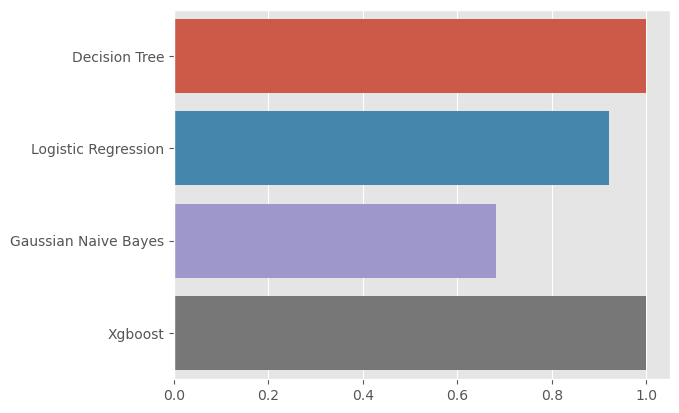

In [82]:
#visualizing the train model accuracy
sns.barplot(y=model_names,x=strain_acc)
plt.show()

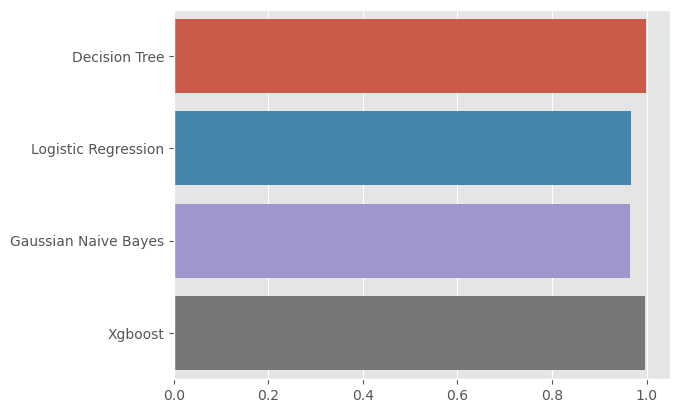

In [83]:
#visualizing the train model accuracy
sns.barplot(y=model_names,x=stest_acc)
plt.show()

In [84]:
#plot a table to show the summary
model_summary = pd.DataFrame({'Model':model_names,'Train Score':strain_acc,'Test Score':stest_acc,
                             'Train Precision': strain_pre, 'Test Precision': stest_pre,
                             'Train Recall': strain_rec, 'Test Recall':stest_rec,
                             'Train F1 score': strain_f1, 'Test F1 score': stest_f1}
                            )
model_summary

,Model,Train Score,Test Score,Train Precision,Test Precision,Train Recall,Test Recall,Train F1 score,Test F1 score
0,Decision Tree,1.000000,0.999360,1.000000,0.670697,1.000000,0.979466,1.000000,0.796194
1,Logistic Regression,0.921018,0.966657,0.963257,0.031890,0.875429,0.856263,0.917245,0.061491
2,Gaussian Naive Bayes,0.681520,0.964182,0.918874,0.014277,0.398195,0.397947,0.555614,0.027565
3,Xgboost,0.998468,0.997756,0.997900,0.361801,0.999038,0.993429,0.998469,0.530424
